<a href="https://colab.research.google.com/github/MaddalenaDona/Possible-counter-intuitive-impact-of-local-vaccine-mandates-for-vaccine-preventable-infectious-disea/blob/main/Figure_3_and_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

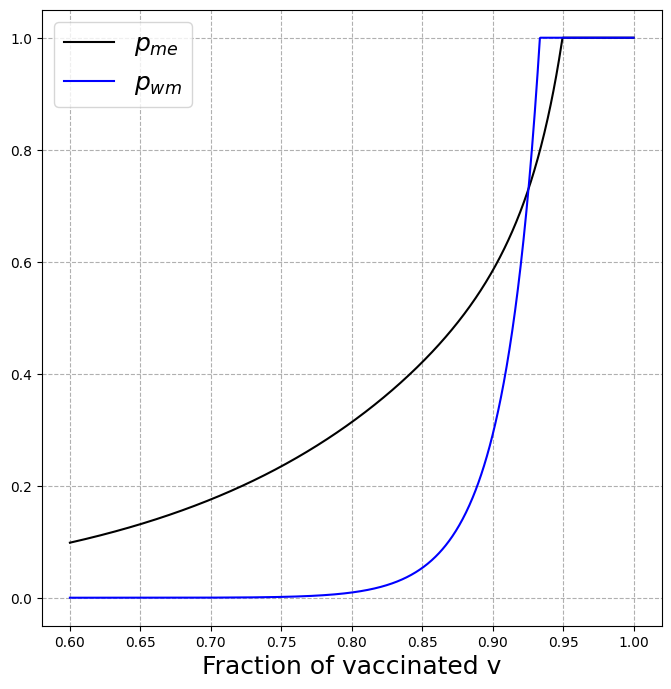

In [ ]:
import numpy as np
from scipy import optimize
import math
import numpy as np
import matplotlib.pyplot as plt

def f(x, v, pi): #function to find $p_{me}$ as the solution of a fixed point equation
  u=(1-v)/(1-pi)
  z=x*(x*u+1-u)**(24) #corresponds to $\Bar{q}$ in the paper
  return np.exp(-5.8*(1-v)*(1-z))

def fun(x, v): #function to find $p_{wm}$
  y=x*(x*(1-v)+v)**(24)
  return y


v=np.linspace(0.6,1,1000) #fraction of vaccinated
pi=0.5 #fraction of schools with the vaccine mandate
X=[]
X1=[]
Y=[]
for i in range(len(v)):
  X.append(optimize.fixed_point(f, 0.4, args=(v[i],pi)))
  X1.append(optimize.fixed_point(f, 0.4, args=(v[i],0))) # x|_{\pi=0}
  Y.append(fun(X1[i],v[i]))


plt.figure(figsize=(8,8))
plt.plot(v,X,'k', label=r'$p_{me}$')
plt.plot(v,Y,'b', label=r'$p_{wm}$')
plt.grid(ls='--')
plt.xlabel('Fraction of vaccinated v', fontsize=18)
plt.legend(fontsize=18)

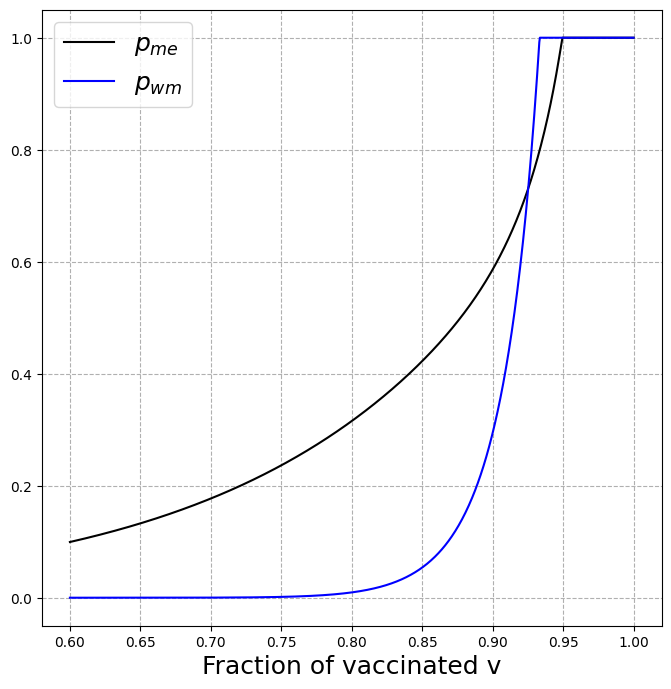

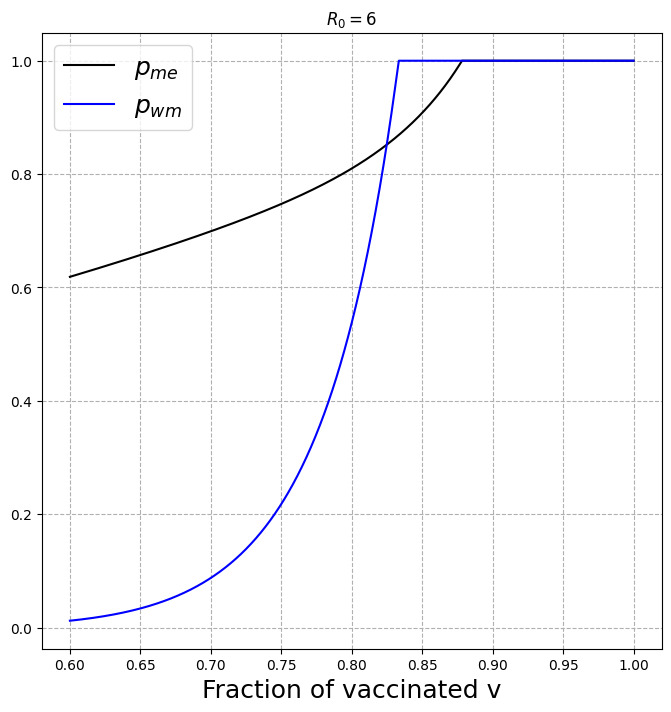

In [4]:
import numpy as np
from scipy import optimize
import math
import numpy as np
import matplotlib.pyplot as plt

def f(x, v, pi,R0): #function to find $p_{me}$ as the solution of a fixed point equation
  u=(1-v)/(1-pi)
  z=x*(x*u+1-u)**(24) #corresponds to $\Bar{q}$ in the paper
  lambdaG=(R0**2)/(R0+nc-1) #rate of global contacts
  return np.exp(-lambdaG*(1-v)*(1-z))

def fun(x, v): #function to find $p_{wm}$
  y=x*(x*(1-v)+v)**(24)
  return y

#plot with R0=15
v=np.linspace(0.6,1,1000) #fraction of vaccinated
pi=0.5 #fraction of schools with the vaccine mandate
nc=25 #number of students per class
X=[]
X1=[]
Y=[]
for i in range(len(v)):
  X.append(optimize.fixed_point(f, 0.4, args=(v[i],pi,15)))
  X1.append(optimize.fixed_point(f, 0.4, args=(v[i],0,15))) # x|_{\pi=0}
  Y.append(fun(X1[i],v[i]))


plt.figure(figsize=(8,8))
plt.plot(v,X,'k', label=r'$p_{me}$')
plt.plot(v,Y,'b', label=r'$p_{wm}$')
plt.grid(ls='--')
plt.xlabel('Fraction of vaccinated v', fontsize=18)
plt.legend(fontsize=18)



#plot with R0=6
v=np.linspace(0.6,1,1000) #fraction of vaccinated
pi=0.5 #fraction of schools with the vaccine mandate
nc=25 #number of students per class
X=[]
X1=[]
Y=[]
for i in range(len(v)):
  X.append(optimize.fixed_point(f, 0.4, args=(v[i],pi,6)))
  X1.append(optimize.fixed_point(f, 0.4, args=(v[i],0,6))) # x|_{\pi=0}
  Y.append(fun(X1[i],v[i]))


plt.figure(figsize=(8,8))
plt.plot(v,X,'k', label=r'$p_{me}$')
plt.plot(v,Y,'b', label=r'$p_{wm}$')
plt.grid(ls='--')
plt.xlabel('Fraction of vaccinated v', fontsize=18)
plt.title('$R_0=6$')
plt.legend(fontsize=18)